# Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import plot_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score

# Data

In [8]:
dev = pd.read_csv('Data/dev.csv')
X_dev = dev.drop(columns=['hospital_death'])
y_dev = dev['hospital_death']

dev_us = pd.read_csv('Data/dev_us.csv')
X_dev_us = dev_us.drop(columns=['hospital_death'])
y_dev_us = dev_us['hospital_death']

dev_os = pd.read_csv('Data/dev_os.csv')
X_dev_os = dev_os.drop(columns=['hospital_death'])
y_dev_os = dev_os['hospital_death']

dev_smote = pd.read_csv('Data/dev_smote.csv')
X_dev_smote = dev_smote.drop(columns=['hospital_death'])
y_dev_smote = dev_smote['hospital_death']

dev_pca95 = pd.read_pickle('Data/dev_pca95.pkl')
X_dev_pca95 = dev_pca95.drop(columns=['hospital_death'])
y_dev_pca95 = dev_pca95['hospital_death']

dev_us_pca95 = pd.read_pickle('Data/dev_us_pca95.pkl')
X_dev_us_pca95 = dev_us_pca95.drop(columns=['hospital_death'])
y_dev_us_pca95 = dev_us_pca95['hospital_death']

dev_os_pca95 = pd.read_pickle('Data/dev_os_pca95.pkl')
X_dev_os_pca95 = dev_os_pca95.drop(columns=['hospital_death'])
y_dev_os_pca95 = dev_os_pca95['hospital_death']

dev_smote_pca95 = pd.read_pickle('Data/dev_smote_pca95.pkl')
X_dev_smote_pca95 = dev_smote_pca95.drop(columns=['hospital_death'])
y_dev_smote_pca95 = dev_smote_pca95['hospital_death']

test = pd.read_csv("Data/test.csv")
X_test = test.drop(columns=['hospital_death'])
y_test = test['hospital_death']

test_pca95 = pd.read_pickle("Data/test_pca95.pkl")
X_test_pca95 = test_pca95.drop(columns=['hospital_death'])
y_test_pca95 = test_pca95['hospital_death']

test_us_pca95 = pd.read_pickle("Data/test_us_pca95.pkl")
X_test_us_pca95 = test_us_pca95.drop(columns=['hospital_death'])
y_test_us_pca95 = test_us_pca95['hospital_death']

test_os_pca95 = pd.read_pickle("Data/test_os_pca95.pkl")
X_test_os_pca95 = test_os_pca95.drop(columns=['hospital_death'])
y_test_os_pca95 = test_os_pca95['hospital_death']

test_smote_pca95 = pd.read_pickle("Data/test_smote_pca95.pkl")
X_test_smote_pca95 = test_smote_pca95.drop(columns=['hospital_death'])
y_test_smote_pca95 = test_smote_pca95['hospital_death']

data = {
    "original": (X_dev, y_dev, X_test, y_test),
    "us": (X_dev_us, y_dev_us, X_test, y_test),
    "os": (X_dev_os, y_dev_os, X_test, y_test),
    "smote": (X_dev_smote, y_dev_smote, X_test, y_test)
}

pca_data = {
    "pca95": (X_dev_pca95, y_dev_pca95, X_test_pca95, y_test_pca95),
    "us_pca95": (X_dev_us_pca95, y_dev_us_pca95, X_test_us_pca95, y_test_us_pca95),
    "os_pca95": (X_dev_os_pca95, y_dev_os_pca95, X_test_os_pca95, y_test_os_pca95),
    "smote_pca95": (X_dev_smote_pca95, y_dev_smote_pca95, X_test_smote_pca95, y_test_smote_pca95)
}


# Random Forests


##Default Settings

In [ ]:
rf_pipe = make_pipeline(StandardScaler(), RandomForestClassifier())

for key in data.keys():
    rf_pipe.fit(data[key][0], data[key][1])
    y_pred=rf_pipe.predict(data[key][2])
    print("Random Forests / {} [Accuracy]: {}".format(key, accuracy_score(data[key][3], y_pred)))
    print("Random Forests / {} [Average Precision]: {}".format(key, average_precision_score(data[key][3], y_pred)))
    print("Random Forests / {} [ROC AUC]: {}".format(key, roc_auc_score(data[key][3], y_pred)))
    print("Random Forests / {} [F1]: {}".format(key, f1_score(data[key][3], y_pred)))


Random Forests / original [Accuracy]: 0.9292373112358938
Random Forests / original [Average Precision]: 0.2649018210630807
Random Forests / original [ROC AUC]: 0.6297761531004391
Random Forests / original [F1]: 0.3951537744641193
Random Forests / us [Accuracy]: 0.8027040287848225
Random Forests / us [Average Precision]: 0.23872948882220626
Random Forests / us [ROC AUC]: 0.8010792813560548
Random Forests / us [F1]: 0.4114490161001788
Random Forests / os [Accuracy]: 0.9254211415798942
Random Forests / os [Average Precision]: 0.2508254509612085
Random Forests / os [ROC AUC]: 0.6379846768393899
Random Forests / os [F1]: 0.40209790209790214
Random Forests / smote [Accuracy]: 0.9181159025241237
Random Forests / smote [Average Precision]: 0.25111008505566945
Random Forests / smote [ROC AUC]: 0.6677377815000369
Random Forests / smote [F1]: 0.43491346877351394


###PCA Data

In [ ]:
rf_pca_pipe = make_pipeline(StandardScaler(), RandomForestClassifier())

for key in pca_data.keys():
    rf_pca_pipe.fit(pca_data[key][0], pca_data[key][1])
    y_pred=rf_pca_pipe.predict(pca_data[key][2])
    print("Random Forests with PCA / {} [Accuracy]: {}".format(key, accuracy_score(pca_data[key][3], y_pred)))
    print("Random Forests with PCA / {} [Average Precision]: {}".format(key, average_precision_score(pca_data[key][3], y_pred)))
    print("Random Forests with PCA / {} [ROC AUC]: {}".format(key, roc_auc_score(pca_data[key][3], y_pred)))
    print("Random Forests with PCA / {} [F1]: {}".format(key, f1_score(pca_data[key][3], y_pred)))

Random Forests with PCA / pca95 [Accuracy]: 0.9273292264078941
Random Forests with PCA / pca95 [Average Precision]: 0.23512003088131542
Random Forests with PCA / pca95 [ROC AUC]: 0.5998436739099954
Random Forests with PCA / pca95 [F1]: 0.32642748863062154
Random Forests with PCA / us_pca95 [Accuracy]: 0.9137000490650384
Random Forests with PCA / us_pca95 [Average Precision]: 0.08629995093496157
Random Forests with PCA / us_pca95 [ROC AUC]: 0.5
Random Forests with PCA / us_pca95 [F1]: 0.0


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: ignored

##Hyperparameter Tuning

###Tuning original

In [ ]:
rf_params = {
    'randomforestclassifier__max_depth': [10, 50, 100, None],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],
    'randomforestclassifier__n_estimators': [50, 100, 500]
}

rf_pipe = make_pipeline(StandardScaler(), RandomForestClassifier())
rf_grid = RandomizedSearchCV(rf_pipe, rf_params, cv = None, refit=True, n_jobs = -1)

for key in data.keys():
    if key== ('original'):
      rf_grid.fit(data[key][0], data[key][1])
      y_pred=rf_grid.predict(data[key][2])
      print("Random Forests / {} [Accuracy]: {}".format(key, accuracy_score(data[key][3], y_pred)))
      print("Random Forests / {} [Average Precision]: {}".format(key, average_precision_score(data[key][3], y_pred)))
      print("Random Forests / {} [ROC AUC]: {}".format(key, roc_auc_score(data[key][3], y_pred)))
      print("Random Forests / {} [F1]: {}".format(key, f1_score(data[key][3], y_pred)))

Random Forests / original [Accuracy]: 0.9295644114921223
Random Forests / original [Average Precision]: 0.26725015096572957
Random Forests / original [ROC AUC]: 0.6302411737479213
Random Forests / original [F1]: 0.3968253968253968


In [ ]:
for key in data.keys():
  if key=='original':
    print("Random Forests / {} : {}".format(key, rf_grid.best_params_))

Random Forests / original : {'randomforestclassifier__n_estimators': 500, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_depth': None}


###Tuning Smote

In [ ]:
rf_params = {
    'randomforestclassifier__max_depth': [10, 50, 100, None],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],
    'randomforestclassifier__n_estimators': [50, 100, 500]
}

smote_rf_pipe = make_pipeline(StandardScaler(), RandomForestClassifier())
smote_rf_grid = RandomizedSearchCV(smote_rf_pipe, rf_params, n_iter=5,cv = None, refit=True, n_jobs = -1)

for key in data.keys():
    if key=='smote':
      smote_rf_grid.fit(data[key][0], data[key][1])
      smote_y_pred=smote_rf_grid.predict(data[key][2])
      print("Random Forests / {} [Accuracy]: {}".format(key, accuracy_score(data[key][3], smote_y_pred)))
      print("Random Forests / {} [Average Precision]: {}".format(key, average_precision_score(data[key][3], smote_y_pred)))
      print("Random Forests / {} [ROC AUC]: {}".format(key, roc_auc_score(data[key][3], smote_y_pred)))
      print("Random Forests / {} [F1]: {}".format(key, f1_score(data[key][3], smote_y_pred)))

Random Forests / smote [Accuracy]: 0.9211688382489233
Random Forests / smote [Average Precision]: 0.26727203443688763
Random Forests / smote [ROC AUC]: 0.6754149096079014
Random Forests / smote [F1]: 0.4531013615733737


In [ ]:
for key in data.keys():
  if key=='smote':
    print("Random Forests / {} : {}".format(key, smote_rf_grid.best_params_))

Random Forests / smote : {'randomforestclassifier__n_estimators': 500, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_depth': None}


In [9]:
original_rf_pipe = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators= 500, min_samples_leaf=1, max_depth= None))
original_rf_pipe.fit(data['original'][0], data['original'][1])
original_y_pred=original_rf_pipe.predict(data['original'][2])

print("Histgradient Boosting / {} [Accuracy]: {}".format('original', accuracy_score(data['original'][3], original_y_pred)))
print("Histgradient Boosting / {} [Average Precision]: {}".format('original', average_precision_score(data['original'][3], original_y_pred)))
print("Histgradient Boosting / {} [ROC AUC]: {}".format('original', roc_auc_score(data['original'][3], original_y_pred)))
print("Histgradient Boosting / {} [F1]: {}".format('original', f1_score(data['original'][3], original_y_pred)))

Histgradient Boosting / original [Accuracy]: 0.9298915117483508
Histgradient Boosting / original [Average Precision]: 0.2701509582491203
Histgradient Boosting / original [ROC AUC]: 0.6315642634977543
Histgradient Boosting / original [F1]: 0.4001865671641791


In [19]:
print(data['original'][0].columns)

Index(['hospital_id', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender',
       'height', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type',
       'pre_icu_los_days', 'weight', 'apache_2_diagnosis',
       'apache_3j_diagnosis', 'arf_apache', 'gcs_eyes_apache',
       'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache',
       'heart_rate_apache', 'intubated_apache', 'map_apache',
       'resprate_apache', 'temp_apache', 'ventilated_apache', 'd1_diasbp_max',
       'd1_diasbp_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max',
       'd1_mbp_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max',
       'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_temp_max',
       'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_heartrate_max',
       'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_resprate_max',
       'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max',
       'h1_sysbp_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_potassi

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


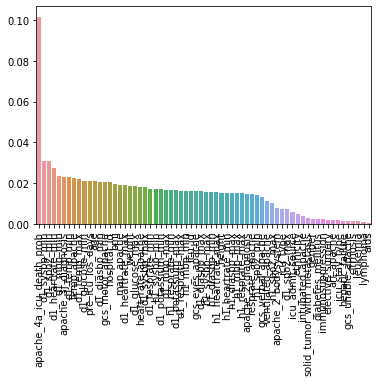

In [23]:
import seaborn as sns
feature_names=data['original'][0].columns

feat_imps=zip(feature_names, original_rf_pipe.named_steps['randomforestclassifier'].feature_importances_)
feats, imps= zip(*(sorted(list(filter(lambda x :x[1]!=0, feat_imps)), key=lambda x :x[1], reverse=True)))

ax=sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=90)



###Attempt to tune all 4

In [ ]:
rf_params = {
    'randomforestclassifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],
    'randomforestclassifier__n_estimators': [200, 500, 800, 1000, 1200, 1500]
}

rf_pipe = make_pipeline(StandardScaler(), RandomForestClassifier())
rf_grid_accuracy = RandomizedSearchCV(rf_pipe, rf_params, cv = None, scoring='accuracy', refit=True, n_jobs = -1)
rf_grid_ap = RandomizedSearchCV(rf_pipe, rf_params, cv = None, scoring='average_precision', refit=True, n_jobs = -1)
rf_grid_auc = RandomizedSearchCV(rf_pipe, rf_params, cv = None, scoring='roc_auc', refit=True, n_jobs = -1)
rf_grid_f1 = RandomizedSearchCV(rf_pipe, rf_params, cv = None, scoring='f1', refit=True, n_jobs = -1)

for key in data.keys():
    rf_grid_accuracy.fit(data[key][0], data[key][1])
    print("Random Forests / {} [Accuracy]: {}".format(key, rf_grid_accuracy.score(data[key][2], data[key][3])))
    rf_grid_ap.fit(data[key][0], data[key][1])
    print("Random Forests / {} [Average Precision]: {}".format(key, rf_grid_ap.score(data[key][2], data[key][3])))
    rf_grid_auc.fit(data[key][0], data[key][1])
    print("Random Forests / {} [ROC AUC]: {}".format(key, rf_grid_auc.score(data[key][2], data[key][3])))
    rf_grid_f1.fit(data[key][0], data[key][1])
    print("Random Forests / {} [F1]: {}".format(key, rf_grid_f1.score(data[key][2], data[key][3])))


KeyboardInterrupt: ignored